In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read In Data

In [2]:
df_BA=pd.read_csv('BA')
df_DS=pd.read_csv('DS')
df_DA=pd.read_csv('DA')
df_DE=pd.read_csv('DE')

# Sample and Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 3983, 1663, 1167)

In [5]:
df_DA=df_DA.sample(n=1000)
df_BA=df_BA.sample(n=1000)

In [6]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 1000, 1000, 1167)

In [7]:
whole_list=[df_DA,df_DS,df_DE,df_BA]
df_whole=pd.concat(whole_list)

# Models

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
def evaluate_model(df,best,rf=False):
    df_train, df_test = train_test_split(df, test_size = 0.3)
    clean_train=df_train["clean"]
    Y_train=df_train["JT"]
    clean_test=df_test["clean"]
    Y_test=df_test["JT"]

    vectorizer = CountVectorizer().fit(df["clean"])
    clean_bow= vectorizer.transform(df["clean"])
    train_bow = vectorizer.transform(clean_train)
    test_bow = vectorizer.transform(clean_test)
    parameter=vectorizer.get_feature_names()
    
    tfidf_transformer = TfidfTransformer().fit(clean_bow)
    X_train = tfidf_transformer.transform(train_bow)
    X_test = tfidf_transformer.transform(test_bow)
    
    best.fit(X_train, Y_train)
    predictions1 = best.predict(X_test)
    print(classification_report(Y_test,predictions1))
    if rf:
        importances =best.feature_importances_
        forest_importances = pd.Series(importances,index=parameter)
        forest_importances=forest_importances.sort_values(ascending=False)[0:10]
        ax=forest_importances.plot.barh(x='lab', y='val')
        ax.invert_yaxis()
    

In [10]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [11]:
def encoding(name):
    df = pd.DataFrame()
    whole_list=[df_DA,df_DS,df_DE,df_BA]
    for i in whole_list:
        name1=get_df_name(i)
        if name1.split("_")[1]!=name:
            i_copy=i.sample(n=340)
        else:
            i_copy=i.copy()
        df=pd.concat([df,i_copy],ignore_index=True)
    df["NEWJT"]= np.where(df["JT"]==name,"1","0")

    df["JT"]=df["NEWJT"]
    return df

In [12]:
BA_model = encoding('BA')

In [13]:
BA_model

,JT,JD,tool_list,skill_list,degree_list,clean,NEWJT
0,0,Use advanced data analysis techniques that lev...,[None],"['data', 'busi']",999.0,"['data', 'busi']",0
1,0,"For more information, please visit www.firstam...","['excel', 'sql', 'power bi', 'bi']","['commun', 'data', 'busi']",1.0,"['excel', 'sql', 'powerbi', 'commun', 'data', ...",0
2,0,CyberSpace Data Analyst\nOutstanding past perf...,[None],"['risk', 'dashboard', 'data', 'predict', 'rese...",1.0,"['risk', 'dashboard', 'data', 'predict', 'rese...",0
3,0,The Data Analyst supports the Managed Care Dep...,"['powerpoint', 'spss', 'excel', 'sa']","['data', 'supervis', 'research', 'statist', 'c...",1.0,"['powerpoint', 'spss', 'excel', 'sa', 'data', ...",0
4,0,About the Role\nWhat You'll Be Doing\nResearch...,"['r', 'sql', 'python']","['data', 'account', 'research', 'busi', 'commun']",999.0,"['r', 'sql', 'python', 'data', 'account', 'res...",0
...,...,...,...,...,...,...,...
2015,1,Organization: Accenture Federal Services\nAcce...,['salesforc'],"['commun', 'busi']",1.0,"['salesforc', 'commun', 'busi']",1
2016,1,State:\nTexas\nCity:\nIrving\nInterest:\nPost ...,"['excel', 'microsoft']","['risk', 'data', 'econom', 'busi', 'commun', '...",1.0,"['excel', 'microsoft', 'risk', 'data', 'econom...",1
2017,1,C2C candidates will not be accepted.\nbull Ass...,[None],"['data', 'analyz']",999.0,"['data', 'analyz']",1
2018,1,Job DescriptionSUMMARYThe Business Analyst is ...,[None],"['commun', 'data', 'busi']",999.0,"['commun', 'data', 'busi']",1


In [14]:
BA_model['JT'].describe()

count     2020
unique       2
top          0
freq      1020
Name: JT, dtype: object

## Decision Tree

              precision    recall  f1-score   support

          BA       0.72      0.82      0.77       313
          DA       0.62      0.63      0.62       311
          DE       0.80      0.74      0.77       340
          DS       0.77      0.70      0.74       278

    accuracy                           0.73      1242
   macro avg       0.73      0.72      0.72      1242
weighted avg       0.73      0.73      0.73      1242



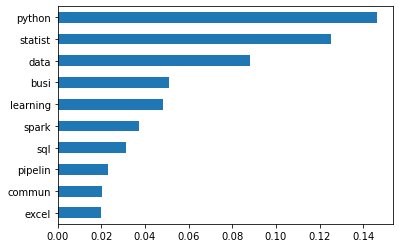

In [15]:
dtree = DecisionTreeClassifier()
evaluate_model(df_whole,dtree,rf=True)

## Random Forest

              precision    recall  f1-score   support

          BA       0.82      0.85      0.83       319
          DA       0.69      0.71      0.70       301
          DE       0.83      0.85      0.84       349
          DS       0.83      0.74      0.78       273

    accuracy                           0.79      1242
   macro avg       0.79      0.79      0.79      1242
weighted avg       0.79      0.79      0.79      1242



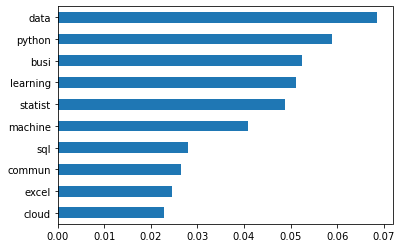

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
evaluate_model(df_whole,rf,rf=True)

In [17]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'n_estimators':(10, 50,100,150,200), #the number of trees
#      'max_depth':(5,10,20,30,50,80),
#      'min_samples_split': (2, 4, 8),
#      'min_samples_leaf': (4,8,12,16)
# }

# model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
# model.fit(X_train, Y_train)
# model.best_score_, model.best_params_

In [18]:
b_model = RandomForestClassifier(max_depth=20,min_samples_leaf=4,min_samples_split=8,n_estimators=200)

              precision    recall  f1-score   support

          BA       0.75      0.82      0.78       298
          DA       0.69      0.65      0.67       312
          DE       0.85      0.83      0.84       354
          DS       0.81      0.80      0.81       278

    accuracy                           0.78      1242
   macro avg       0.78      0.78      0.78      1242
weighted avg       0.78      0.78      0.78      1242



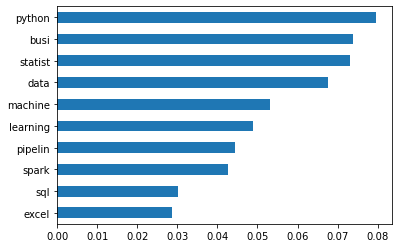

In [19]:
evaluate_model(df_whole,b_model,rf=True)

### Rf for each JT

In [20]:
BA_model = encoding('BA')
DE_model = encoding('DE')
DS_model = encoding('DS')
DA_model = encoding('DA')

In [21]:
rf = RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       303
           1       0.88      0.88      0.88       303

    accuracy                           0.88       606
   macro avg       0.88      0.88      0.88       606
weighted avg       0.88      0.88      0.88       606



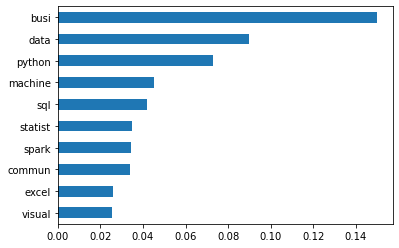

In [22]:
evaluate_model(BA_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       318
           1       0.78      0.84      0.81       288

    accuracy                           0.81       606
   macro avg       0.81      0.81      0.81       606
weighted avg       0.81      0.81      0.81       606



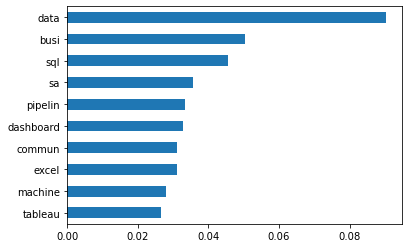

In [23]:
evaluate_model(DA_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       301
           1       0.87      0.82      0.85       297

    accuracy                           0.85       598
   macro avg       0.85      0.85      0.85       598
weighted avg       0.85      0.85      0.85       598



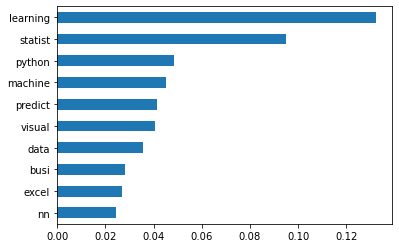

In [24]:
evaluate_model(DS_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       308
           1       0.89      0.87      0.88       349

    accuracy                           0.87       657
   macro avg       0.87      0.87      0.87       657
weighted avg       0.87      0.87      0.87       657



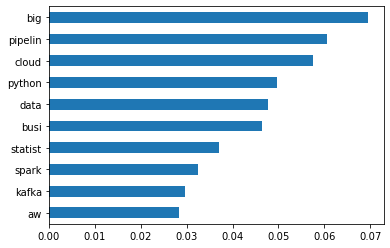

In [25]:
evaluate_model(DE_model,rf,rf=True)

## Bagging

In [26]:
from sklearn.ensemble import BaggingClassifier
# parameters = {
#      'n_estimators':(30, 50,80), #the number of trees
#      'max_samples':(20,40,60,80,100,120,150,200),
#      'max_features':(20,40,60,80,100,120,150,200),
     
# }

# model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
# model.fit(X_train, Y_train)
# model.best_score_, model.best_params_

In [27]:
bg_model=BaggingClassifier(max_features=120,max_samples=200,n_estimators=80)
evaluate_model(df_whole,bg_model)

              precision    recall  f1-score   support

          BA       0.70      0.86      0.77       292
          DA       0.69      0.57      0.63       304
          DE       0.79      0.81      0.80       335
          DS       0.83      0.77      0.80       311

    accuracy                           0.75      1242
   macro avg       0.75      0.75      0.75      1242
weighted avg       0.76      0.75      0.75      1242



In [28]:
bg=BaggingClassifier()

In [29]:
evaluate_model(BA_model,bg)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       300
           1       0.89      0.91      0.90       306

    accuracy                           0.89       606
   macro avg       0.89      0.89      0.89       606
weighted avg       0.89      0.89      0.89       606



In [30]:
evaluate_model(DA_model,bg)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       319
           1       0.77      0.79      0.78       287

    accuracy                           0.79       606
   macro avg       0.79      0.79      0.79       606
weighted avg       0.79      0.79      0.79       606

